In [3]:
import pandas as pd

# Load cleaned datasets
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierra_leone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Add a country column for easy plotting
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all into one DataFrame
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)
df_all.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


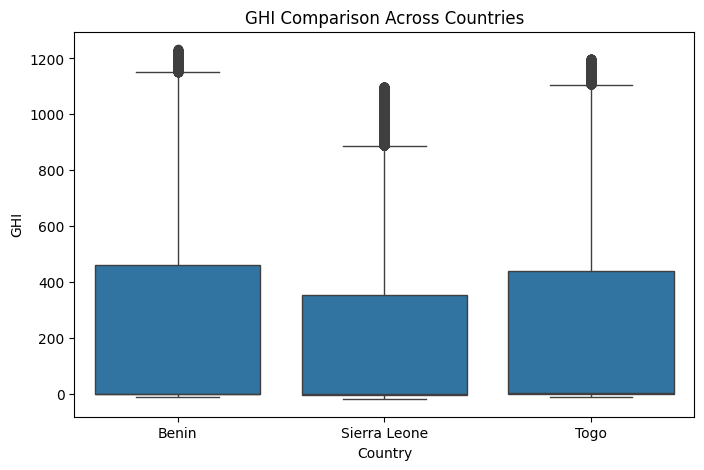

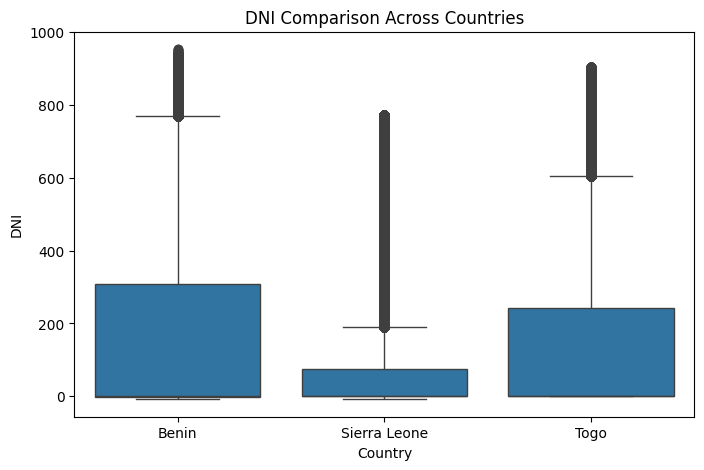

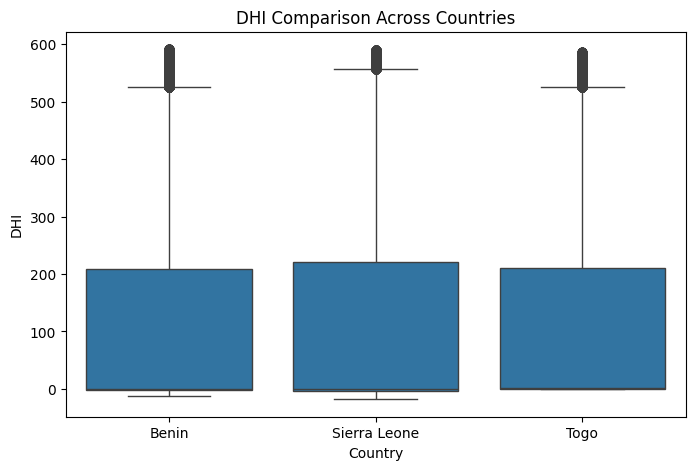

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Comparison Across Countries')
    plt.show()


In [5]:
summary_table = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
summary_table


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         232.766020    0.7  327.095351  164.437476   -0.1  260.921667   
Sierra Leone  196.440576    0.0  291.236243  104.527217   -0.1  201.696328   
Togo          229.831878    2.0  321.643788  149.368966    0.0  248.554496   

                     DHI                     
                    mean median         std  
Country                                      
Benin         110.019584    0.5  152.556984  
Sierra Leone  110.107836   -0.4  154.171728  
Togo          112.404125    1.8  151.296253

In [6]:
from scipy.stats import f_oneway, kruskal


ghi_values = [benin['GHI'], sierra_leone['GHI'], togo['GHI']]
f_stat, p_val = f_oneway(*ghi_values)
print(f"ANOVA for GHI: F-statistic={f_stat:.2f}, p-value={p_val:.4e}")


ANOVA for GHI: F-statistic=2174.50, p-value=0.0000e+00


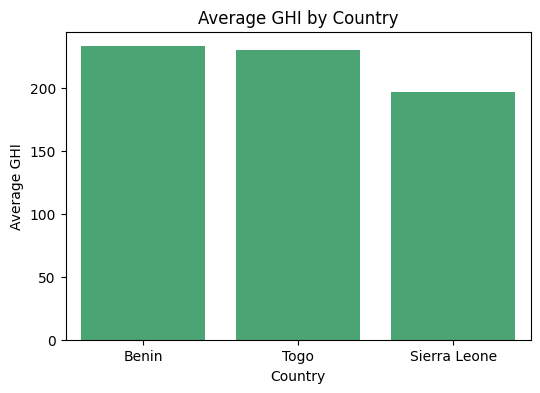

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, color='mediumseagreen')  # use color instead of palette
plt.title("Average GHI by Country")
plt.ylabel("Average GHI")
plt.show()

